# Example 02: Phase transformation in Fe

In this example, we will make use of the temperature sweep algorithm in `calphy` to calculate the transformation temperature for BCC to FCC transition in Fe.

The EAM potential that will be used: [Meyer, R, and P Entel. “Martensite-austenite transition and phonon dispersion curves of Fe1−xNix studied by molecular-dynamics simulations.” Phys. Rev. B 57, 5140.](https://doi.org/10.1103/PhysRevB.57.5140)

The reference data is from: [Freitas, Rodrigo, Mark Asta, and Maurice de Koning. “Nonequilibrium Free-Energy Calculation of Solids Using LAMMPS.” Computational Materials Science 112 (February 2016): 333–41.](https://doi.org/10.1016/j.commatsci.2015.10.050)

The [input file](input.yaml) a is provided in the folder. The calculation can be started from the terminal using:

```
calphy -i input.yaml
```

In the input file, the `calculations` block is as shown below:

```
calculations:
- element: Fe
  lattice: BCC
  lattice_constant: 0.0
  mass: 55.845
  md:
    barostat_damping: 0.1
    equilibration_control: nose_hoover
    thermostat_damping: 0.1
    timestep: 0.001
  mode: ts
  n_equilibration_steps: 10000
  n_iterations: 1
  n_switching_steps: 25000
  pair_coeff: '* * ../potentials/Fe.eam'
  pair_style: eam
  pressure: 0.0
  queue:
    commands:
    - conda activate calphy
    cores: 4
    scheduler: local
  reference_phase: solid
  repeat:
  - 5
  - 5
  - 5
  temperature:
  - 100.0
  - 1400.0
- element: Fe
  lattice: FCC
  lattice_constant: 6.0
  mass: 55.845
  md:
    barostat_damping: 0.1
    equilibration_control: nose_hoover
    thermostat_damping: 0.1
    timestep: 0.001
  mode: ts
  n_equilibration_steps: 10000
  n_iterations: 1
  n_switching_steps: 25000
  pair_coeff: '* * ../potentials/Fe.eam'
  pair_style: eam
  pressure: 0.0
  queue:
    commands:
    - conda activate calphy
    cores: 4
    scheduler: local
  reference_phase: solid
  repeat:
  - 5
  - 5
  - 5
  temperature:
  - 100.0
  - 1400.0
```

The mode is listed as `ts`, which stands for temperature sweep. The sweep starts from the first value in the `temperature` option, which is 100 K. The free energy is integrated until 1400 K, which is the second value listed. Furthermore, there are also two calculation blocks. You can see that the `lattice` mentioned is different; one set is for BCC structure, while the other is FCC.

Once the calculation is over, there will a file called `temperature_sweep.dat` in each of the folders. This file indicates the variation of free energy with the temperature. We can read in the files and calculate the transition temperature as follows:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
bt, bfe, bferr = np.loadtxt("ts-bcc-solid-100-0/temperature_sweep.dat", unpack=True)
ft, ffe, fferr = np.loadtxt("ts-fcc-solid-100-0/temperature_sweep.dat", unpack=True)

args = np.argsort(np.abs(bfe-ffe))
print(bt[args[0]], "K")

507.3998490732654 K


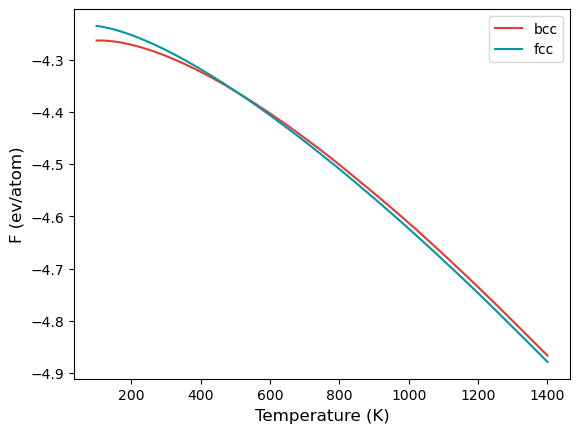

In [3]:
plt.plot(bt, bfe, color="#E53935", label="bcc")
plt.plot(ft, ffe, color="#0097A7", label="fcc")
plt.xlabel("Temperature (K)", fontsize=12)
plt.ylabel("F (ev/atom)", fontsize=12)
plt.legend()
plt.savefig("fe_transition.png", dpi=300, bbox_inches="tight")